In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev, mean
import numpy as np
pd.set_option('display.max_columns',None)
data = pd.read_csv('/NFS_SQUAD_HISTO/OCI_DATA/02_intermediate/preprocessed_oss_counter_all_v3_new.csv',delimiter ='|')
data = data.sort_values(by=['week_period'])
data = data.drop('Unnamed: 0', axis =1)
def process_cell_name(cell):
    return cell.replace("_dismantled","")
data['processed_cell_name'] = data.cell_name.apply(process_cell_name)

In [6]:
to_delete = data[data.duplicated(subset=['processed_cell_name','date'])].sort_values(['date','processed_cell_name'])
cleaned_data = data.drop(to_delete.index)

In [7]:
data_per_site = cleaned_data.groupby(['site_id','date'],as_index=False)\
                                .agg({'cell_name':'nunique',
                                    'total_data_traffic_dl_gb':'sum',
                                    'total_voice_traffic_kerlands':'sum',
                                    'average_throughput_user_dl_kbps':'mean',
                                    'average_throughput_user_ul_kbps':'mean',
                                    'cell_occupation_dl_percentage':'mean',
                                    'average_number_of_users_dl':'mean',
                                    'average_number_of_users_ul':'mean',
                                    'cell_occupation_ul_percentage':'mean',
                                    'total_data_traffic_ul_gb':'sum',
                                    'lost_traffic_kerlands':'sum',
                                    'traffic_loss_rate':'mean',
                                    'average_number_of_users_in_queue':'mean',})
data_per_site

,site_id,date,cell_name,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_ul_percentage,total_data_traffic_ul_gb,lost_traffic_kerlands,traffic_loss_rate,average_number_of_users_in_queue
0,OCI0001,2020-02-10,21,2170.797442,16437.77,1208.443333,139.445000,67.411905,30.270000,NaN,20.173333,149.559184,0.000000,NaN,NaN
1,OCI0001,2020-02-17,21,2188.379873,16922.50,1193.445556,134.071111,67.805238,31.953333,NaN,20.410000,176.044830,0.000000,NaN,NaN
2,OCI0001,2020-02-24,21,2092.959974,16492.88,1775.892857,330.532857,67.258571,31.300000,NaN,20.076667,153.262439,1926.415714,0.047619,2.233333
3,OCI0001,2020-03-02,21,2263.563901,17638.44,1707.894286,353.967143,68.397143,33.846667,NaN,21.230000,177.654123,1478.000000,0.034392,2.435333
4,OCI0001,2020-03-09,21,2352.227472,17900.44,1671.476667,323.338095,68.928571,36.150000,NaN,21.866667,174.069959,2106.994286,0.047619,2.784000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204753,SMALL,2021-06-21,2,0.000000,0.00,NaN,NaN,38.865000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
204754,SMALL,2021-06-28,2,1.220000,15.88,3842.630000,975.000000,75.645000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
204755,SMALL,2021-07-05,2,0.000000,0.00,NaN,NaN,NaN,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN
204756,SMALL,2021-07-12,2,0.000000,0.00,NaN,NaN,NaN,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN


In [15]:
cols = data_per_site.columns.drop(['date','site_id','cell_name','lost_traffic_kerlands'])
sites = cleaned_data.site_id.unique()
for col in cols :
    stds = 7
    serie = data_per_site.groupby(['site_id'])[col].apply(list)
    corrupted_cells = []
    for cell,values in serie.items():
        if len([x for x in values if x==x]) > 2:
            vmax = max(values)
            try : 
                vmin = min([x for x in values if x!=0 and x == x])
            except ValueError:
                vmin = vmax 
            vmean = mean(values)
            vstd  = stdev(values)
            if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
                print(cell, col)
                

OCI1269 total_data_traffic_dl_gb
OCI1957 total_data_traffic_dl_gb
OCI2013 total_data_traffic_dl_gb
OCI2125 total_data_traffic_dl_gb
OCI3204 total_data_traffic_dl_gb
OCI2125 average_number_of_users_dl
OCI0021 total_data_traffic_ul_gb
OCI0192 total_data_traffic_ul_gb
OCI1651 total_data_traffic_ul_gb
OCI2125 total_data_traffic_ul_gb
OCI2578 total_data_traffic_ul_gb
OCI3204 total_data_traffic_ul_gb
OCI2494 traffic_loss_rate


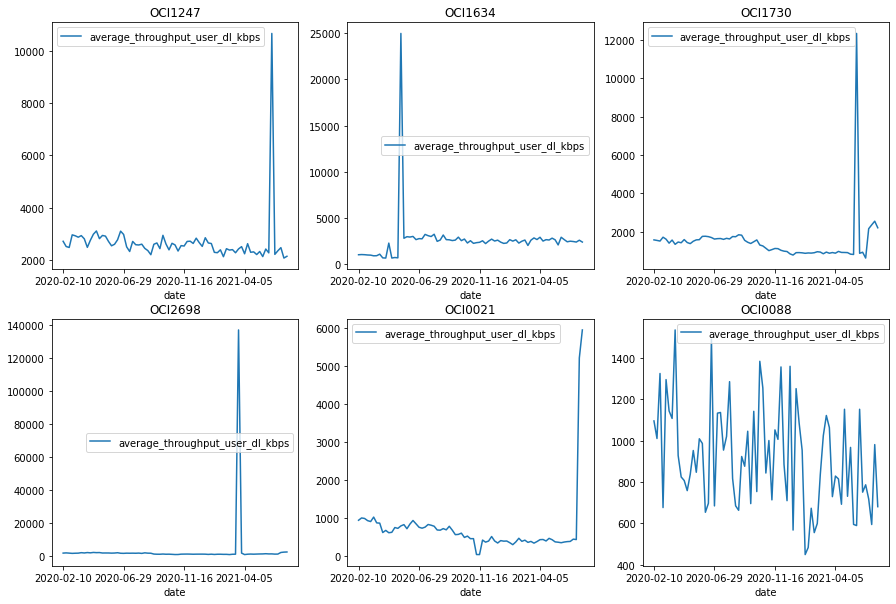

In [14]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
data_per_site[data_per_site.site_id == 'OCI1247'][['average_throughput_user_dl_kbps','date']]\
.plot(x='date',ax=axs[0,0])
axs[0,0].set_title('OCI1247')
data_per_site[data_per_site.site_id == 'OCI1634'][['average_throughput_user_dl_kbps','date']]\
.plot(x='date',ax=axs[0,1])
axs[0,1].set_title('OCI1634')
data_per_site[data_per_site.site_id == 'OCI1730'][['average_throughput_user_dl_kbps','date']]\
.plot(x='date',ax=axs[0,2])
axs[0,2].set_title('OCI1730')
data_per_site[data_per_site.site_id == 'OCI2698'][['average_throughput_user_dl_kbps','date']]\
.plot(x='date',ax=axs[1,0])
axs[1,0].set_title('OCI2698')
data_per_site[data_per_site.site_id == 'OCI0021'][['average_throughput_user_dl_kbps','date']]\
.plot(x='date',ax=axs[1,1])
axs[1,1].set_title('OCI0021')
data_per_site[data_per_site.site_id == 'OCI0088'][['average_throughput_user_dl_kbps','date']]\
.plot(x='date',ax=axs[1,2])
axs[1,2].set_title('OCI0088')
plt.show()

<AxesSubplot:xlabel='date'>

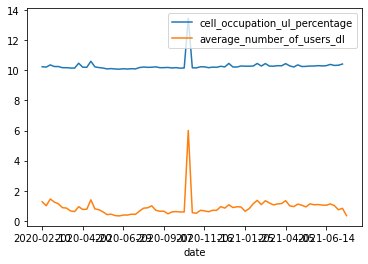

In [11]:
data_per_site[data_per_site.site_id == 'OCI2125'][['cell_occupation_ul_percentage','average_number_of_users_dl',
                                                   'date']].plot(x='date')

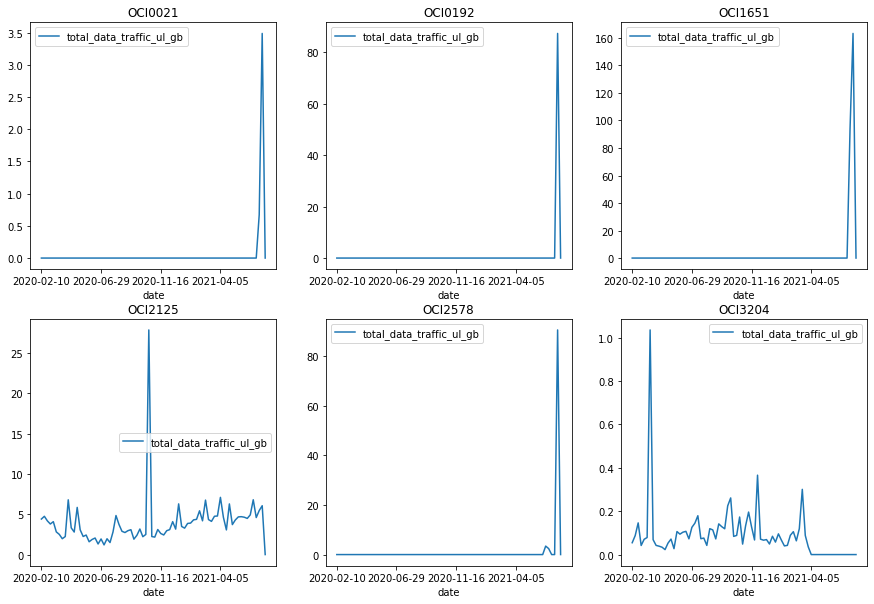

In [12]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
data_per_site[data_per_site.site_id == 'OCI0021'][['total_data_traffic_ul_gb','date']]\
.plot(x='date',ax=axs[0,0])
axs[0,0].set_title('OCI0021')
data_per_site[data_per_site.site_id == 'OCI0192'][['total_data_traffic_ul_gb','date']]\
.plot(x='date',ax=axs[0,1])
axs[0,1].set_title('OCI0192')
data_per_site[data_per_site.site_id == 'OCI1651'][['total_data_traffic_ul_gb','date']]\
.plot(x='date',ax=axs[0,2])
axs[0,2].set_title('OCI1651')
data_per_site[data_per_site.site_id == 'OCI2125'][['total_data_traffic_ul_gb','date']]\
.plot(x='date',ax=axs[1,0])
axs[1,0].set_title('OCI2125')
data_per_site[data_per_site.site_id == 'OCI2578'][['total_data_traffic_ul_gb','date']]\
.plot(x='date',ax=axs[1,1])
axs[1,1].set_title('OCI2578')
data_per_site[data_per_site.site_id == 'OCI3204'][['total_data_traffic_ul_gb','date']]\
.plot(x='date',ax=axs[1,2])
axs[1,2].set_title('OCI3204')
plt.show()

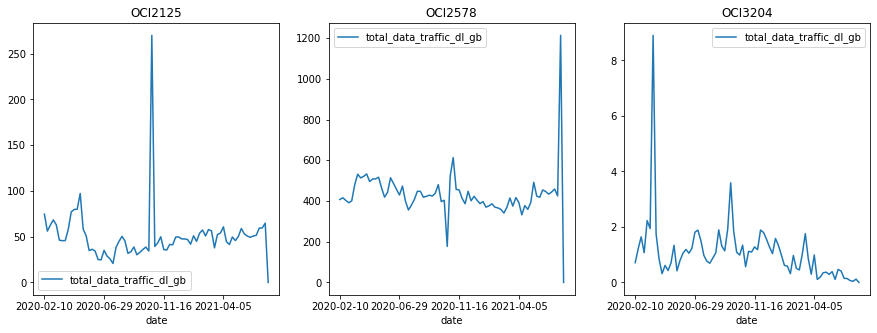

In [19]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
data_per_site[data_per_site.site_id == 'OCI2125'][['total_data_traffic_dl_gb','date']]\
.plot(x='date',ax=axs[0])
axs[0].set_title('OCI2125')
data_per_site[data_per_site.site_id == 'OCI2578'][['total_data_traffic_dl_gb','date']]\
.plot(x='date',ax=axs[1])
axs[1].set_title('OCI2578')
data_per_site[data_per_site.site_id == 'OCI3204'][['total_data_traffic_dl_gb','date']]\
.plot(x='date',ax=axs[2])
axs[2].set_title('OCI3204')
plt.show()

In [13]:
data

,index,cell_name,date,cell_band,cell_tech,cell_sector,year,week,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_ul_percentage,total_data_traffic_ul_gb,lost_traffic_kerlands,traffic_loss_rate,average_number_of_users_in_queue,processed_cell_name
2357262,1199163,OCI1528_DED_L26-1,2020-02-10,L26,4G,1,2020,7,202007,OCI1528,195.104622,0.00,NaN,NaN,17.16,11.14,NaN,13.73,35.293137,0.0,NaN,NaN,OCI1528_DED_L26-1
1400808,226723,OCI0274_CAMPEMENT_G18-1,2020-02-10,G18,2G,1,2020,7,202007,OCI0274,2.877000,2916.24,39.04,22.08,27.04,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,OCI0274_CAMPEMENT_G18-1
1995627,831357,OCI1014_SOROBANGO_U9-3,2020-02-10,U9,3G,3,2020,7,202007,OCI1014,26.250000,64.88,4504.88,401.00,81.87,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,OCI1014_SOROBANGO_U9-3
2470972,1314639,OCI1715_HOTEL_IVOIRE_PALMIER_L26-1,2020-02-10,L26,4G,1,2020,7,202007,OCI1715,138.929640,0.00,NaN,NaN,15.91,7.04,NaN,13.48,31.052161,0.0,NaN,NaN,OCI1715_HOTEL_IVOIRE_PALMIER_L26-1
1400858,226775,OCI0274_CAMPEMENT_G18-2,2020-02-10,G18,2G,2,2020,7,202007,OCI0274,7.017000,2619.66,35.27,21.67,30.19,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,OCI0274_CAMPEMENT_G18-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132188,132188,OCI0307_CNTIG_U21-22,2021-07-19,U21,3G,2,2021,29,202129,OCI0307,0.000000,0.00,NaN,NaN,NaN,1.00,1.0,NaN,0.000000,0.0,0.0,1.0,OCI0307_CNTIG_U21-22
905754,905754,OCI2275_MAHINO_U9-2,2021-07-19,U9,3G,2,2021,29,202129,OCI2275,0.000000,0.00,NaN,NaN,NaN,3.00,3.0,NaN,0.000000,0.0,0.0,2.0,OCI2275_MAHINO_U9-2
832027,832027,OCI2124_BABA_U9-2,2021-07-19,U9,3G,2,2021,29,202129,OCI2124,0.000000,0.00,NaN,NaN,NaN,0.00,0.0,NaN,0.000000,0.0,0.0,1.0,OCI2124_BABA_U9-2
564354,564354,OCI1410_ADJAME_MOSQUEE_U21-22,2021-07-19,U21,3G,2,2021,29,202129,OCI1410,0.000000,0.00,NaN,NaN,NaN,1.00,2.0,NaN,0.000000,0.0,0.0,1.0,OCI1410_ADJAME_MOSQUEE_U21-22
